In [1]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("weight-height.csv")
data = data.drop("Gender",axis=1)
data

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


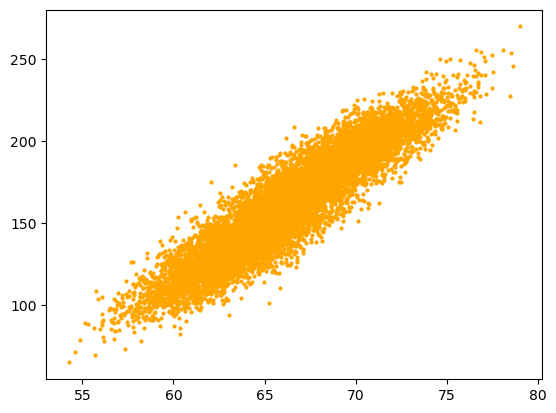

In [6]:
plt.plot(data["Height"],data["Weight"],'o',markersize=2,color="orange")

In [11]:
data['Height'] = data['Height'].round()

In [13]:
data['Weight'] = data['Weight'].round()

In [15]:
data.head()

,Height,Weight
0,74.0,242.0
1,69.0,162.0
2,74.0,213.0
3,72.0,220.0
4,70.0,206.0


In [17]:
data.info

<bound method DataFrame.info of       Height  Weight
0       74.0   242.0
1       69.0   162.0
2       74.0   213.0
3       72.0   220.0
4       70.0   206.0
...      ...     ...
9995    66.0   137.0
9996    67.0   171.0
9997    64.0   128.0
9998    69.0   164.0
9999    62.0   114.0

[10000 rows x 2 columns]>

Text(0, 0.5, 'Height')

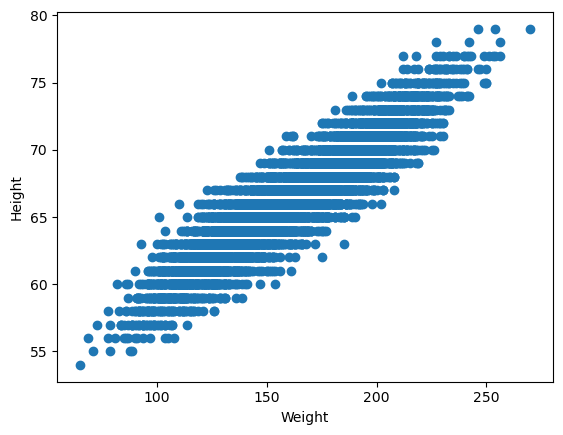

In [19]:
plt.scatter(data["Weight"],data["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [20]:
data.corr()

,Height,Weight
Height,1.00000,0.92202
Weight,0.92202,1.00000


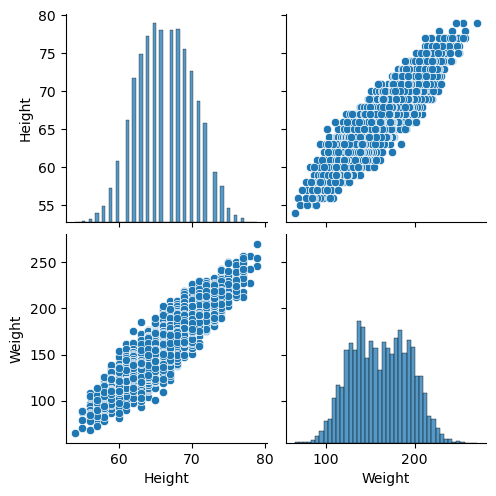

In [23]:
#seaborn pairplot function 
sns.pairplot(data)

In [24]:
## divide feature as dependent and independent features 

#independent features
X = data[["Weight"]]

#dependent features 
y = data["Height"]

### Always rememder that your independent features always in DataFrame form or in 2D array form

### Train Test Split 

In [29]:
# Train test fit 
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Standardization 

..

In [35]:
from sklearn.preprocessing import StandardScaler

In [37]:
scalar = StandardScaler()

In [39]:
X_train = scalar.fit_transform(X_train)

In [41]:
X_test = scalar.transform(X_test)

In [43]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [45]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [47]:

print("Cofficient or slope : ",regression.coef_)

Cofficient or slope :  [3.54556557]


In [49]:
print("Intercept : ",regression.intercept_)

Intercept :  66.3484


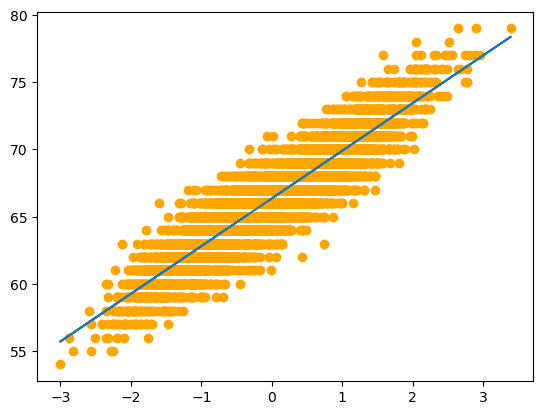

In [51]:
## plot training data plot best fit line 
plt.scatter(X_train,y_train,color="orange")
plt.plot(X_train,regression.predict(X_train))

In [53]:
y_pred = regression.predict(X_test)

In [55]:
y_pred


array([67.6516292 , 70.08770962, 67.31943642, ..., 62.22581373,
       66.76578178, 66.54431992])

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred) 
rmse = np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  2.1932072347184026
MAE :  1.182635822906207
RMSE :  1.4809480864359839


### R-Squared 

In [62]:
from sklearn.metrics import r2_score

In [64]:
score = r2_score(y_test,y_pred)

In [70]:
print(f"Your mode is {score*100} % accurate")

Your mode is 85.32410692414112 % accurate
